# **Cerinta 1**
Specificaţi, proiectaţi, implementaţi si testati cate un algoritm de regresie pentru prima problema bazat pe:

metoda gradientului descrescator bazat pe batch-uri, cu tool/API si/sau cod propriu (tema).

In [ ]:
import random

class MySGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # simple stochastic GD
    def fit(self, x, y, learningRate = 0.001, noEpochs = 1000):
        self.coef_ = [0.0 for _ in range(len(x[0]) + 1)]    #beta or w coefficients y = w0 + w1 * x1 + w2 * x2 + ...
        # self.coef_ = [random.random() for _ in range(len(x[0]) + 1)]    #beta or w coefficients
        for epoch in range(noEpochs):
            # TBA: shuffle the trainind examples in order to prevent cycles
            for i in range(len(x)): # for each sample from the training data
                ycomputed = self.eval(x[i])     # estimate the output
                crtError = ycomputed - y[i]     # compute the error for the current sample
                for j in range(0, len(x[0])):   # update the coefficients
                    self.coef_[j] = self.coef_[j] - learningRate * crtError * x[i][j]
                self.coef_[len(x[0])] = self.coef_[len(x[0])] - learningRate * crtError * 1

        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi

    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/world-happiness-report-2017.zip"

# Directory to extract the contents
extract_to_directory = "dateP1"

# Create the directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

In [ ]:
import csv
import os

from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [ ]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data')
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model')
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

In [ ]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

In [ ]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

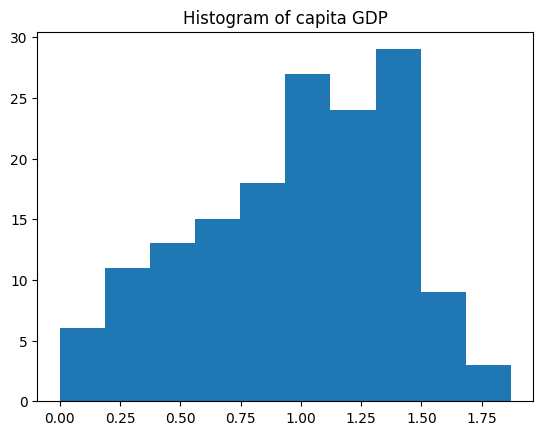

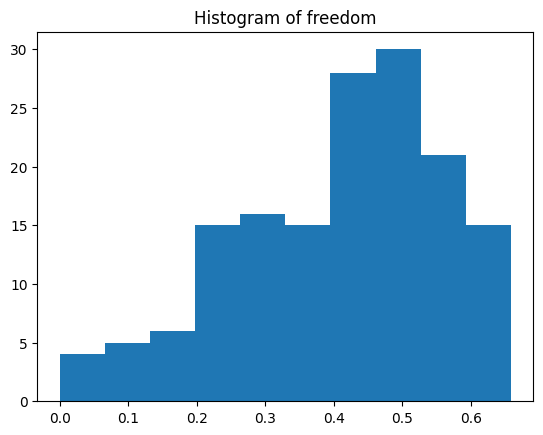

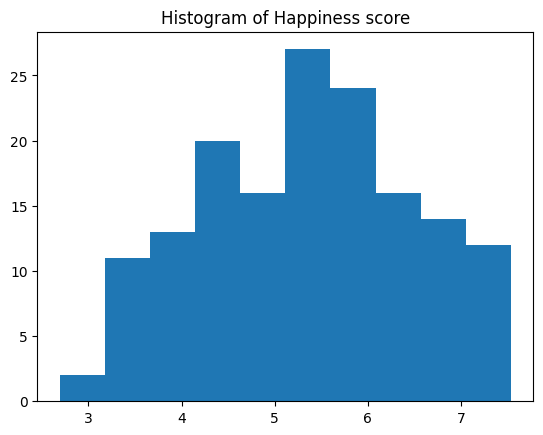

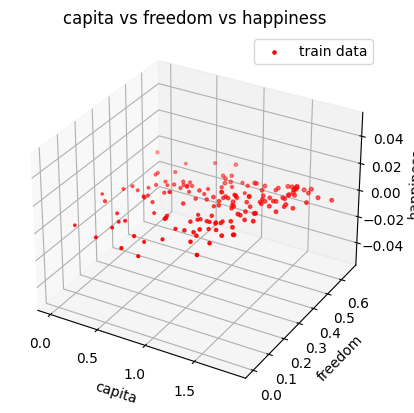

In [ ]:
inputs, outputs = loadDataMoreInputs("/content/dateP1/world-happiness-report-2017.csv", ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

In [ ]:
def normalisation(trainData, testData):
  scaler = StandardScaler()
  if not isinstance(trainData[0], list):
      #encode each sample into a list
      trainData = [[d] for d in trainData]
      testData = [[d] for d in testData]

      scaler.fit(trainData)  #  fit only on training data
      normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
      normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

      #decode from list to raw values
      normalisedTrainData = [el[0] for el in normalisedTrainData]
      normalisedTestData = [el[0] for el in normalisedTestData]
  else:
      scaler.fit(trainData)  #  fit only on training data
      normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
      normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
  return normalisedTrainData, normalisedTestData

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: s must be a scalar, or float array-like with the same size as x and y

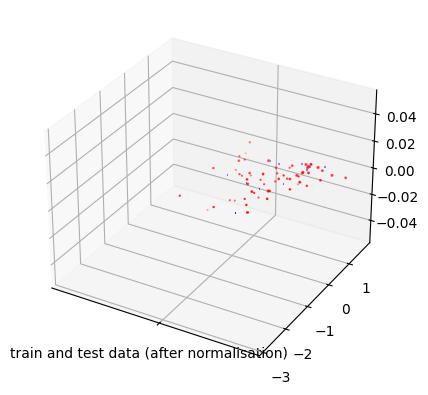

In [ ]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

# Check if test data lists are not empty before plotting
if feature1test and feature2test and testOutputs:
    plot3Ddata(feature1train, feature2train, trainOutputs, feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

In [ ]:
# model initialisation
regressor = MySGDRegression()

regressor.fit(trainInputs, trainOutputs)
#parameters of the liniar regressor
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )


the learnt model: f(x) =  -0.0014527924544318889  +  0.6978631617347402  * x1 +  0.30375393537641193  * x2


ValueError: s must be a scalar, or float array-like with the same size as x and y

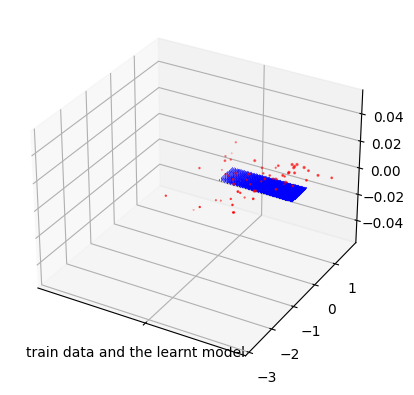

In [ ]:
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(noOfPoints):  # Adjust loop range
    for _ in range(noOfPoints):  # Adjust loop range
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(noOfPoints):  # Adjust loop range
    aux = val
    for _ in range(noOfPoints):  # Adjust loop range
        xref2.append(aux)
        aux += step2

yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]

# Check if any of the arrays are empty before plotting
if xref1 and xref2:
    plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, 'train data and the learnt model')

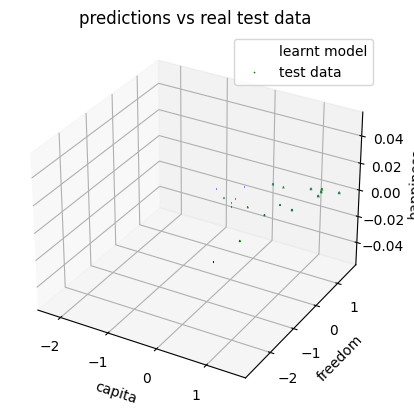

In [ ]:
computedTestOutputs = regressor.predict(testInputs)
plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

In [ ]:
#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

prediction error (manual):  0.2331793993161317
prediction error (tool):    0.23317939931613166


# **Cerinta 1: cod implementat manual**

In [ ]:
class MySGDRegression2:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # Implementarea funcției fit pentru antrenare
    def fit(self, x, y, learningRate = 0.001, noEpochs = 1000):
        self.coef_ = [0.0 for _ in range(len(x[0]) + 1)]    # coeficienții w
        for epoch in range(noEpochs):
            # Amestecarea exemplelor de antrenare pentru a preveni ciclurile
            indexes = [i for i in range(len(x))]
            random.shuffle(indexes)
            for i in indexes:
                ycomputed = self.eval(x[i])     # estimarea ieșirii
                crtError = ycomputed - y[i]     # calculul erorii pentru exemplul curent
                for j in range(0, len(x[0])):   # actualizarea coeficienților
                    self.coef_[j] = self.coef_[j] - learningRate * crtError * x[i][j]
                self.coef_[len(x[0])] = self.coef_[len(x[0])] - learningRate * crtError * 1

        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

    # Implementarea funcției eval pentru evaluare
    def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi

    # Implementarea funcției predict pentru predicție
    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed

In [ ]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection='3d')
    if x1Train:
        plt.scatter(x1Train, x2Train, yTrain, c='r', marker='o', label='train data')
    if x1Model:
        plt.scatter(x1Model, x2Model, yModel, c='b', marker='_', label='learnt model')
    if x1Test:
        plt.scatter(x1Test, x2Test, yTest, c='g', marker='^', label='test data')
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

In [ ]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

In [ ]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

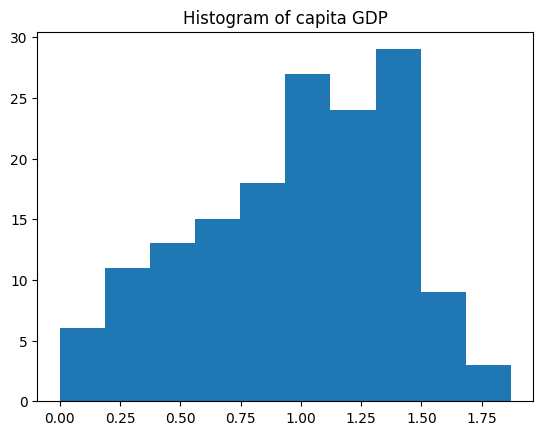

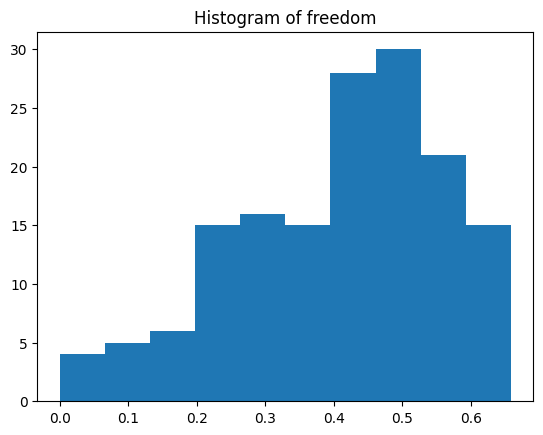

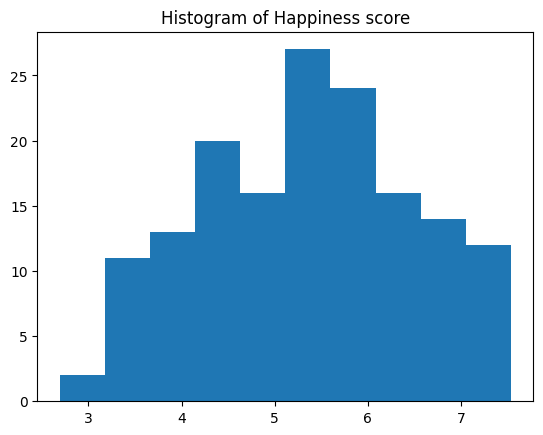

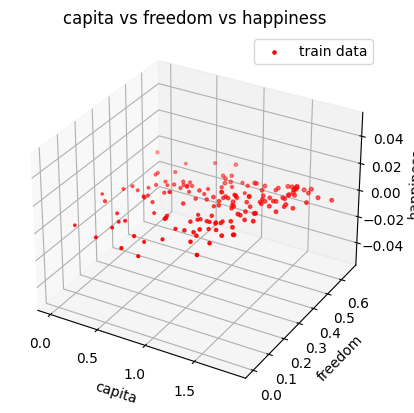

In [ ]:
inputs, outputs = loadDataMoreInputs("/content/dateP1/world-happiness-report-2017.csv", ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

In [ ]:
def normalisation(trainData, testData):
  scaler = StandardScaler()
  if not isinstance(trainData[0], list):
      #encode each sample into a list
      trainData = [[d] for d in trainData]
      testData = [[d] for d in testData]

      scaler.fit(trainData)  #  fit only on training data
      normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
      normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

      #decode from list to raw values
      normalisedTrainData = [el[0] for el in normalisedTrainData]
      normalisedTestData = [el[0] for el in normalisedTestData]
  else:
      scaler.fit(trainData)  #  fit only on training data
      normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
      normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
  return normalisedTrainData, normalisedTestData

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: s must be a scalar, or float array-like with the same size as x and y

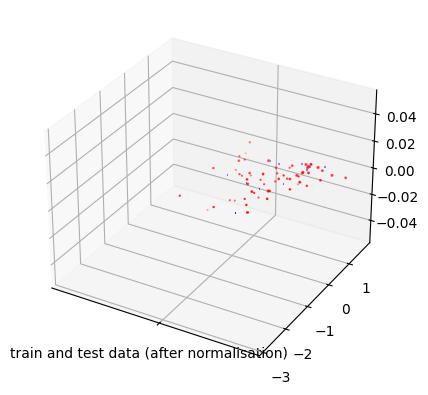

In [ ]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

# Check if test data lists are not empty before plotting
if feature1test and feature2test and testOutputs:
    plot3Ddata(feature1train, feature2train, trainOutputs, feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

In [ ]:
# model initialisation
regressor = MySGDRegression2()

regressor.fit(trainInputs, trainOutputs)
#parameters of the liniar regressor
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )

the learnt model: f(x) =  -0.0007977872168736523  +  0.6973687088571607  * x1 +  0.304247012872521  * x2


ValueError: s must be a scalar, or float array-like with the same size as x and y

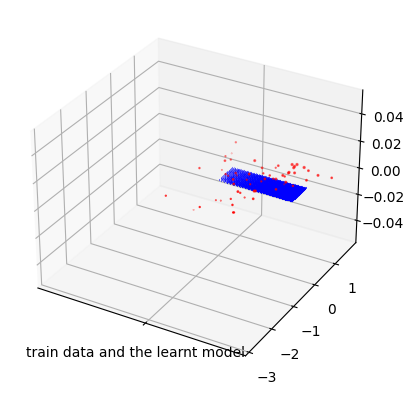

In [ ]:
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(noOfPoints):  # Adjust loop range
    for _ in range(noOfPoints):  # Adjust loop range
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(noOfPoints):  # Adjust loop range
    aux = val
    for _ in range(noOfPoints):  # Adjust loop range
        xref2.append(aux)
        aux += step2

yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]

# Check if any of the arrays are empty before plotting
if xref1 and xref2:
    plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, 'train data and the learnt model')

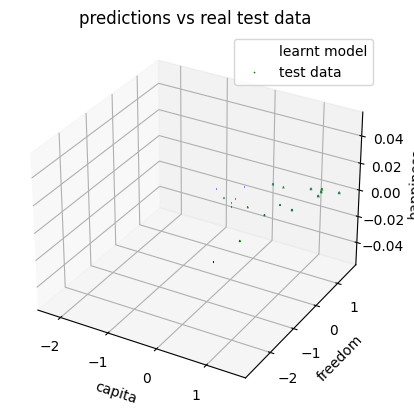

In [ ]:
computedTestOutputs = regressor.predict(testInputs)
plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')

In [ ]:
#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

prediction error (manual):  0.23336862319075463
prediction error (tool):    0.2333686231907547


# **Cerinta 2**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

dataURL = "https://archive.ics.uci.edu/static/public/17/data.csv"
data = pd.read_csv(dataURL)
print(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Excludem coloana 'Diagnosis' pentru a evita erorile în preprocesare
features = data.drop(columns=['Diagnosis'])

# Tratarea valorilor lipsă
imputer = SimpleImputer(strategy='mean')  # sau 'median' sau 'most_frequent'
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Scalarea caracteristicilor
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Reîncorporarea datelor scalate într-un DataFrame Pandas
scaled_data_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data_df['Diagnosis'] = data['Diagnosis']

# Salvează datele preprocesate
scaled_data_df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
X = data[['radius1', 'texture1']]  # Caracteristici: raza și textură
y = data['Diagnosis']  # Variabila țintă: benign sau malign

# Separarea datelor în set de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Antrenarea modelului de regresie logistică
model = LogisticRegression()
model.fit(X_train, y_train)

# Testarea modelului
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

# Predicție pentru cazul specific
specific_case = [[18, 10]]  # Valorile razei și texturii pentru leziunea specifică
prediction = model.predict(specific_case)
print("Prediction for specific case:", prediction)

Accuracy: 91.23%
Prediction for specific case: ['M']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Cerinta 2: cu Logistic Regression implementat**

In [ ]:
import numpy as np

class LogisticRegression2:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient descent updates
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = np.where(y_predicted > 0.5, 1, 0)
        return y_predicted_cls

# Convertim etichetele clasei în valori numerice
y_train_num = (y_train == 'benign').astype(int)
y_test_num = (y_test == 'benign').astype(int)

# Inițializarea și antrenarea modelului de regresie logistică personalizat
model = LogisticRegression2()
model.fit(X_train.values, y_train_num)

# Testarea modelului
y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test_num, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

# Predicție pentru cazul specific
specific_case = np.array([[18, 10]])  # Valorile razei și texturii pentru leziunea specifică
prediction = model.predict(specific_case)
if prediction == 0:
    print("Prediction for specific case: Malign")
else:
    print("Prediction for specific case: Benign")

Accuracy: 100.00%
Prediction for specific case: Malign


# **Cerinta 3**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

dataURL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(dataURL)
columns = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species']
data = pd.read_csv(dataURL, names=columns)
print(data.columns)

In [ ]:
X = data.drop('species', axis=1)
y = data['species']

# Separarea datelor în set de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Antrenarea modelului de regresie logistică
model = LogisticRegression()
model.fit(X_train, y_train)

# Testarea modelului
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acuratețea modelului:", accuracy)

# Predicție pentru o floare specifică
specific_flower = [[6.5, 3.0, 5.5, 2.0]]  # Caracteristicile unei flori specifice de iris
predicted_species = model.predict(specific_flower)
print("Specia prezisă pentru floarea specifică:", predicted_species)

Acuratețea modelului: 1.0
Specia prezisă pentru floarea specifică: ['Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Cerinta 3: cu Logistic regression implementat**

In [ ]:
import numpy as np

class LogisticRegressionIris:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient descent updates
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = np.where(y_predicted > 0.5, 1, 0)
        return y_predicted_cls

# Coloanele specifice pentru problema florilor de iris
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Caracteristicile specifice pentru cazul dat
specific_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Sepal length, sepal width, petal length, petal width

# Etichetele claselor specifice pentru problema florilor de iris
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Inițializarea și antrenarea modelului de regresie logistică personalizat
model = LogisticRegressionIris()
model.fit(X_train.values, y_train_num)

# Testarea modelului
y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test_num, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

# Predicție pentru cazul specific
prediction = model.predict(specific_flower)
predicted_class = class_labels[prediction[0]]
print("Prediction for specific case:", predicted_class)

ValueError: operands could not be broadcast together with shapes (120,) (455,) 

## **Cerintele optionale**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Încărcarea setului de date Iris
iris = load_iris()
X, y = iris.data, iris.target

# Definirea modelului logistic regression
log_reg_model = LogisticRegression(max_iter=1000)

# Aplicarea validării încrucișate cu 5 fold-uri
scores = cross_val_score(log_reg_model, X, y, cv=5)

# Afișarea scorurilor obținute în fiecare fold
print("Cross-validated scores:", scores)

# Calcularea scorului mediu
mean_score = scores.mean()

# Afișarea scorului mediu
print(f"Mean accuracy: {mean_score:.3f}")

Cross-validated scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.973


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Încărcarea setului de date Iris
iris = load_iris()
X, y = iris.data, iris.target

# Definirea modelului logistic regression
log_reg_model = LogisticRegression(max_iter=1000)

# Aplicarea validării încrucișate cu 5 fold-uri
scores = cross_val_score(log_reg_model, X, y, cv=5)

# Afisarea scorurilor obținute în fiecare fold
print("Cross-validated scores:", scores)

# Calcularea scorului mediu și a deviației standard
mean_score = scores.mean()
std_score = scores.std()

# Afișarea rezultatelor
print(f"Mean accuracy: {mean_score:.3f}")
print(f"Standard deviation of accuracy: {std_score:.3f}")

Cross-validated scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.973
Standard deviation of accuracy: 0.025


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Încărcarea setului de date Iris
iris = load_iris()
X, y = iris.data, iris.target

# Definirea modelului logistic regression
log_reg_model = LogisticRegression(max_iter=1000)

# Definirea diferitelor funcții de loss
loss_functions = ['log', 'hinge', 'modified_huber']

# Validare încrucișată cu diferite funcții de loss
for loss in loss_functions:
    log_reg_model.loss = loss
    scores = cross_val_score(log_reg_model, X, y, cv=5)
    print(f"Mean accuracy with {loss} loss: {scores.mean():.3f} +/- {scores.std():.3f}")

Mean accuracy with log loss: 0.973 +/- 0.025
Mean accuracy with hinge loss: 0.973 +/- 0.025
Mean accuracy with modified_huber loss: 0.973 +/- 0.025


In [ ]:
#To evaluate the quality of a classifier for different threshold values, we can use various evaluation metrics such as:
#1. Accuracy: The percentage of examples classified correctly out of the total examples.
#2. Recall (Sensitivity): The percentage of true positive examples (minority class) classified correctly out of the total true positive examples.
#3. Precision: The percentage of positive examples classified correctly out of the total examples classified as positive.
#4. F1-score: The harmonic mean between recall and precision.
#5. Area under the ROC curve (AUC-ROC): Measures the ability of the classifier to distinguish between positive and negative classes.


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Încărcarea setului de date Iris
iris = load_iris()
X, y = iris.data, iris.target

# Convertirea problemei într-o problemă binară
y_binary = (y == 0).astype(int)  # Setosa vs Non-Setosa

# Impartirea setului de date în set de antrenare și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Antrenarea clasificatorului logistic
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Calculul probabilităților de apartenență la clasa pozitivă
probabilities = clf.predict_proba(X_test)[:, 1]

# Definirea diferitelor valori ale pragului de decizie
thresholds = [0.2, 0.4, 0.6, 0.8]

# Calculul metricilor pentru fiecare valoare a pragului
for threshold in thresholds:
    y_pred = (probabilities >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, probabilities)
    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}")

Threshold: 0.20
Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-score: 1.000, AUC-ROC: 1.000
Threshold: 0.40
Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-score: 1.000, AUC-ROC: 1.000
Threshold: 0.60
Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-score: 1.000, AUC-ROC: 1.000
Threshold: 0.80
Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-score: 1.000, AUC-ROC: 1.000
